# MSiA422 Java & Python Homework 2
By Lauren Yu

**CONTENT**
- 1.Bubble Sort Function
- 2.Merge Sort Function
- 3.Comparison and Summary

In [758]:
%reset
%pylab inline
matplotlib.style.use('ggplot')
import string, pandas as pd

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Populating the interactive namespace from numpy and matplotlib


### 1. Bubble Sort Function
Parameters of the bubbleSort() function:
- alist: A list of strings, integers or others. It has to contain elements of the same type, otherwise we return an error message --- **except when the list consists of integers and floats only.**
- reverse: By default false (ascending order). If true, then we sort by reverse (descending).
- key: The function by which we sort the values. By fault none.

It returns:
- The sorted list.

In [759]:
def bubbleSort(alist,reverse=False,key=None):
    """Find unique data types contained in the list
    If uniform type, ok
    If not uniform type but has only int and float, ok
    Otherwise not ok, returns error message
    
    If regular order, with no key
    then swap elements. Smaller item comes first.
    If with key, compare key(item1) and key(item2)
    
    If reverse order with no key,
    then swap elements. Bigger item comes first.
    If with key, then compare key(item1), key(item2) instead"""
    
    get_type= list(set([type(i) for i in alist]))
    if len(get_type)!=1 and get_type!=[int,float]:
        print("Can't deal with list of mixed types. Sorted() in Python can't do it either.")
        print("Sorry!")
    for pass_num in range(len(alist)-1,0,-1):
        for i in range(pass_num):
            #Regular order
            if not reverse:
                if key is None:
                    if alist[i]>alist[i+1]:
                        temp = alist[i]
                        alist[i] = alist[i+1]
                        alist[i+1] = temp
                    else:
                        if key(alist[i])>key(alist[i+1]):
                            temp = alist[i]
                            alist[i] = alist[i+1]
                            alist[i+1] = temp
            else:
                if key is None:
                    if alist[i]<alist[i+1]:
                        temp = alist[i]
                        alist[i] = alist[i+1]
                        alist[i+1] = temp
                    else:
                        #With key
                        if key(alist[i])<key(alist[i+1]):
                            temp = alist[i]
                            alist[i] = alist[i+1]
                            alist[i+1] = temp
    return alist

The bubbleSort() function (and our next *mergeSort()* function) will be tested on the below iterables:

In [760]:
"""Test lists, randomly generated"""
"""Random numbers"""
numbers = numpy.random.rand(1,10).tolist()

"""Random strings"""
chars=' '.join(string.ascii_uppercase + string.digits).split(' ')
strings = [random.choice(chars) for k in range(10)]

"""A list of lists of random numbers"""
lists = numpy.random.rand(4,2).tolist()

"""A tuple with random elements"""
student_tuples = [(random.choice(chars), 'A', numpy.random.rand(1,1)[0][0]),
                 (random.choice(chars), 'B', numpy.random.rand(1,1)[0][0]),
                 (random.choice(chars), 'C', numpy.random.rand(1,1)[0][0])]

"""A mixed list"""
mixed = numpy.random.rand(1,3).tolist()
mixed = mixed + [random.choice(chars) for k in range(3)]


"""Compare bubbleSort on test lists against sorted() results"""
everything=[numbers, strings, lists,student_tuples,mixed]

for e in everything:
    try:
        print(bubbleSort(e)==sorted(e))
        print(bubbleSort(e, reverse=True)==sorted(e, reverse=True))
    except:
        break

True
True


It seems everything is working. Now let's see how bubbleSort() handles key functions for each of the test lists specified above.

In [763]:
"""To save time, let's define a function first
It takes a list, a key and a sorting function"""
def compare(alist,akey,func,reverse=False):
    switch=reverse
    mysort=func(alist,key=akey, reverse=switch)
    pysort=sorted(alist, key=akey, reverse=switch)
    if sum(mysort!=pysort)>0:
        """If there's any discrepancy"""
        print('Original List:',alist)
        print('-----')
    else:
        print("Results agree")



"""#for list of strings, compare by first character"""
strkey=lambda x: x[0]
compare(strings, strkey, bubbleSort)

"""#for list of numbers, compare by a random function output"""
numkey=lambda x: x/log10(x)
compare(numbers, numkey, bubbleSort)

"""#for list of tuples, compare by 3rd element"""
tupkey=lambda x: x[2]
compare(student_tuples,tupkey, bubbleSort)

"""#for a list of lists, compare by last element"""
lskey=lambda x:x[-1]
compare(lists, lskey, bubbleSort)

Original List: ['3', 'G', 'U', '8', 'X', '4', 'X', '6', 'M', 'Z']
-----
Results agree
Original List: [('1', 'A', 0.6075157144538782), ('7', 'B', 0.98462184621880322), ('L', 'C', 0.51352902141156753)]
-----
Original List: [[0.8115981436332995, 0.7795523385965585], [0.885080155097639, 0.3224210518232872], [0.10716543173998427, 0.16124975726807989], [0.672786361462869, 0.7141498933545607]]
-----


All results agree for the 4 test lists (with uniform element types). This means our bubbleSort() function is working!

### 2. Merge Sort Function
Parameters of the mergeSort() function:
- alist: A list of strings, integers or others. It has to contain elements of the same type, otherwise we return an error message --- **except when the list consists of integers and floats only.**
- reverse: By default false (ascending order). If true, then we sort by reverse (descending).
- key: The function by which we sort the values. By fault none.

It returns:
- The sorted list.

In [722]:
def mergeSort(lst, reverse=False,key=None):
    
    #Find the unique element types in the list
    get_type= list(set([type(i) for i in lst]))
    if len(get_type)!=1 and get_type!=[int,float]:
        #If we don't have uniform list element type
        #except the situation of integer with float
        #which Python sorted() can still sort
        print("Can't deal with list of mixed types. Sorted() in Python can't do it either.")
        print("Sorry!")
        
    switch=reverse #This helps us pass the switch to the sub function
    if len(lst) <= 1: #If list exhausted
        return lst
    mid = len(lst) // 2 #Midpoint fot split
    left = mergeSort(lst[:mid],switch,key) #Split
    right = mergeSort(lst[mid:],switch, key)

    def merge(left, right, switch):
        if not left: #If exhausted
            return right
        if not right: #If exhausted
            return left
        if not switch: # If regular order
            if key is None:
                if left[0] < right[0]:
                    #smaller item first, keep merge the rest
                    return [left[0]] + merge(left[1:], right, switch)
            else:
                if key(left[0]) < key(right[0]):
                    return [left[0]] + merge(left[1:], right, switch)
        else:
            if key is None:
                if left[0] > right[0]:
                #smaller item first, keep merge the rest
                    return [left[0]] + merge(left[1:], right, switch)
            else:
                if key(left[0]) > key(right[0]):
                    return [left[0]] + merge(left[1:], right, switch)
                
        return [right[0]] + merge(left, right[1:], switch)
    
    return merge(left, right, switch)

Again, let's compare our mergeSort() results with sorted().

In [723]:
#Compare against sorted()
for e in everything:
    try:
        #Compare bubbleSort results with Python sorted
        print(mergeSort(e)==sorted(e)) #Regular order
        print(mergeSort(e, reverse=True)==sorted(e, reverse=True)) #Reverse
    except:
        break

True
True
True
True
True
True
True
True
Can't deal with list of mixed types. Sorted() in Python can't do it either.
Sorry!
Can't deal with list of mixed types. Sorted() in Python can't do it either.
Sorry!


In [724]:
#for list of strings, compare by first character
compare(strings, strkey, mergeSort)
        
#for list of numbers, compare by a random function output
compare(numbers, numkey, mergeSort)

#for list of tuples, compare by 3rd element
compare(student_tuples,tupkey, mergeSort)

#for a list of lists, compare by last element
compare(lists, lskey, mergeSort)

Results agree
Results agree
Results agree
Results agree


### 3. Comparison and Summary
Let's compare the two sorting algorithms on a list of randomly generated strings.

In [725]:
import random, string
from timeit import Timer

def randomword(charlength):
    #Let's randomly choose *n (n=length, which is input)
    #characters in the pool of letters 'abcdefghijk' and blank.
    #A string will be returned.
    if isinstance(charlength, int):
        return ''.join(random.choice('abcdefghijk'+' ') for i in range(charlength))
    else:
        print("Error. Please give me an integer.")
        
#Try it
randomword(1000)

'fcehiifbbjjgc cdkkddgeaibdd kje hgbafbjadkedfkifkhihchibcabghbk kbgbgcgdhibbfgheibb fbdfceaje bidica  ii faiejghc   ebkkjdgj fa ebjffj kgfkeckki akchdiadibbd bhghbiffbghj ga hcfekhe  bagf ekbd ekgf gihicjejhdjfick  afkdabgkdfjffikbefdkfihgcfjffe fbadcgicjb khbfkebid cb gjggkhjcjidhjkdfada e akhihhjigiai ek ak caedkajcdcdggfehieijabebhjffcfhgda fkcgbheedfcigc gd iggbdahiiac dfdggcbbhaabggiiedajcaabehjgfbjdkbfggjbfkkhec gagiaeadcegbbfkej ghbjaki ciak cbekegcikbk dc ebbadggg hddbcdfebgbacj khghjkb bjdhcgdfhkkgg dce fbekdibeeichhgcifkkch  ajddcf d dgh ehhhbgehfgiic adhgjeebkejhdjkk cbchb begffcahkabbeabcaebjkf  ebkadbhkiejdiakehecdgc eahfjjfieabieeeigah kc gfkahek gh aehfdjeecfgikicfibhjjfbbed iieac ihhfieikfhgci fjbdjffcacgehhifkfhbjfkgabfcb  e ffbefkaiibiigfijakgfkabfbbckaabb hjffcbjabak dichgkhbggdjfdjkjid  jbfhafgjjcighbhfcebgfehficeehiee dhchhjekbch ggfkjb dc ffbehcjbjkdbijjaaefagciaibbdebibh  jabgfiaighig b gahejca fka gkbb cbikiekdckgghhheeaiffkaafh jaki g aegfiijkjbhaeiic i kedceb

Then let's write a function *timecomparison*.
Input:
- 'functiontype': determines the type of function we run, whether it be 'merge' or 'bubble'. Doesn't take other arguments.
- 'minlength': the minimum length of the string list we test on.
- 'maxlength': the max length of the string list we test on.

Function:
- Track the time it takes to run bubbleSort or mergeSort for lists of varying length (varying between min and max length)
- Store the time records in a list. Return the list, which will be used for plotting later.

In [726]:
def timecomparison(functiontype,minlength,maxlength):
    if isinstance(minlength, int) & isinstance(maxlength, int):
        #Create an empty list to store all the tracked time records
        time=[]
        maxlength=maxlength+1
        for i in range(minlength,maxlength):
            #Generate a list consisting of random numbers
            #chosen from the range of min and max length
            rand_sample=random.sample(range(minlength, maxlength+1),i-minlength+1)
            #for each number in rand_sample
            #generate a list of random strings, length=that number
            test=[randomword(k) for k in rand_sample]
            #Now we get the time and append it to time list.
            if functiontype=='merge':
                time.append(Timer(lambda: mergeSort(test)).timeit(number=1))
            elif functiontype=='bubble':
                time.append(Timer(lambda: bubbleSort(test)).timeit(number=1))
            else:
                print('Function type not accepted!')
        return time
    else:
        print("Please input integers.")

In [727]:
#Generate two lists of time for each algorithm
bubbletime=timecomparison('bubble',1,100)
mergetime=timecomparison('merge',1,100)

In [735]:
#Make a new dataframe
computingtime=pd.DataFrame()
computingtime['bubblesort']=bubbletime
computingtime['mergesort']=mergetime

#Print out summary statistics
print('Comparing the summary statistics')
print('--------------------------------')
sys.stdout.write("{0:<20}{1:<12}{2:<12}{3:<12}{4:<12}\n".format('Algorithm', "Average", "Max", "Min", "Median"))
for col in computingtime.columns.values:
    avg=round(computingtime[col].mean(),6)
    maxi=round(computingtime[col].max(),6)
    mini=round(computingtime[col].min(),6)
    medi=round(computingtime[col].median(),6)
    #Note that you shouldn't write mean(df[col])
    #Because it will implicitly transform the
    #pandas series into a list, which might not
    #be the most efficient way.
    sys.stdout.write("{0:<20}{1:<12}{2:<12}{3:<12}{4:<12}\n".format(col, avg, maxi, mini, medi))

Comparing the summary statistics
--------------------------------
Algorithm           Average     Max         Min         Median      
bubblesort          0.001258    0.012536    1.4e-05     0.000756    
mergesort           0.001343    0.005891    1.4e-05     0.001087    


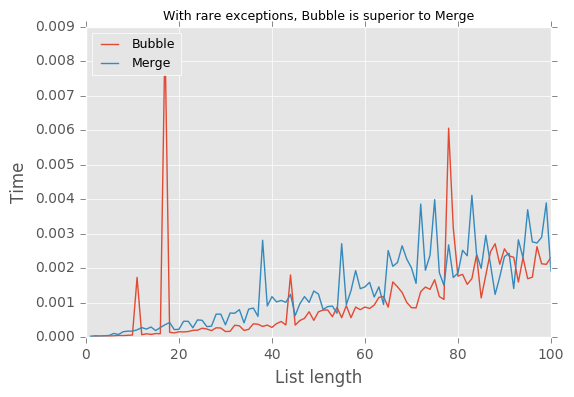

In [717]:
#Plot it
plot(range(1,101),bubbletime,label='Bubble')
plot(range(1,101),mergetime, label='Merge')
legend(loc=2,fontsize=9)
xlabel('List length')
ylabel('Time')
title('With rare exceptions, Bubble is superior to Merge', fontsize=9)

As both the summary statistics and plot have confirmed: on average, Bubble Sort is superior to Merge Sort.